In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyne import material
from pyne.material import MaterialLibrary
from pyne import nuc_data
mats = MaterialLibrary(nuc_data, datapath='/material_library/materials', nucpath='/material_library/nucid')

In [84]:
w = mats['Water, Liquid']

In [85]:
w.mcnp()

u'C name: Water, Liquid\nC density = 1.0\nm?\n     1001 -1.1187e-01\n     1002 -2.5713e-05\n     8016 -8.8570e-01\n     8017 -3.5857e-04\n     8018 -2.0482e-03\n'

In [86]:
a = mats["Air (dry, near sea level)"]
a.mcnp()

u'C name: Air (dry, near sea level)\nC density = 0.0\nm?\n     6012 -1.2256e-04\n     6013 -1.4365e-06\n     7014 -7.5232e-01\n     7015 -2.9442e-03\n     8016 -2.3115e-01\n     8017 -9.3580e-05\n     8018 -5.3454e-04\n     18036 -3.8527e-05\n     18038 -7.6673e-06\n     18040 -1.2781e-02\n'

# Energy bins

## 0.6 - 1.5 MeV

In [87]:
import numpy as np

In [88]:
def med_erg(e):
    return 20.2 * np.exp(-1.78 * e)

In [173]:
med_erg(0.65)

6.3514466408012336

In [90]:
med_erg(1.5-0.05)

1.5291050114426159

## 1.5 - 10.5 MeV

In [91]:
def high_erg(e):
    return 7.2 * np.exp(-1.09 * e)

In [172]:
high_erg(2.0)

0.81389902061123887

In [93]:
high_erg(10.5)

7.7060558285406563e-05

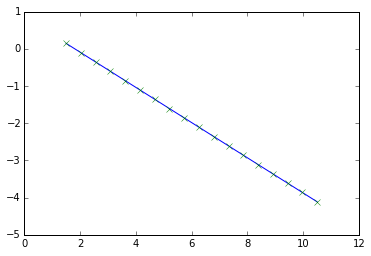

In [94]:
x = np.linspace(1.5, 10.5, 18)
plt.plot(x, np.log10(high_erg(x)))
plt.plot(x, [np.log10(high_erg(xi)) for xi in x], "x")
plt.show()

# How many photons correspond to 1e5 n/s?

In [95]:
n_per_s = 1e5
n_per_fission = 3.76
fission_per_s = n_per_s / n_per_fission
g_per_fission = 8.13
g_per_s = g_per_fission * fission_per_s

In [96]:
g_per_s

216223.40425531918

In [97]:
g_per_shake = g_per_s * 1e-8 # (g / s * s / shake)

In [98]:
g_per_shake

0.0021622340425531917

In [99]:
import pandas as pd

In [110]:
photon_time = pd.read_csv('photon_data.tsv', sep=r'\s*')

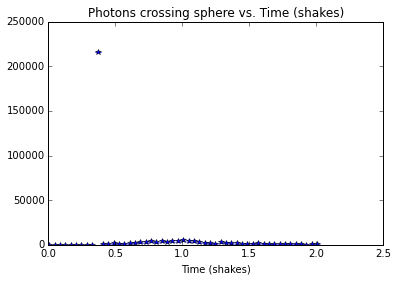

In [101]:
plt.errorbar(photon_time["Time"], photon_time["Tally"], photon_time["Error"] * photon_time["Tally"], fmt="*")
plt.title("Photons crossing sphere vs. Time (shakes)")
plt.xlabel("Time (shakes)")
#plt.ylim([0.,1.05])
plt.show()

# Photon stupid check table 110

In [102]:
import numpy as np

In [103]:
photon_dist = pd.read_csv('photon_table_110.tsv', sep=r'\s*')

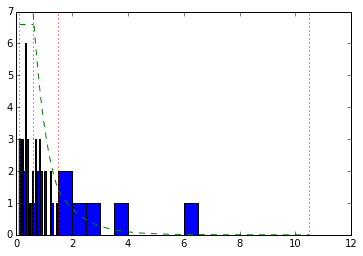

In [181]:
bins = np.arange(0.1, 0.6, 0.05)
bins = np.append(bins, np.arange(0.6, 1.5, 0.05))
bins = np.append(bins, np.arange(1.5, 10.5, 0.5))
plt.hist(photon_dist['energy'], bins=bins)
plt.axvline(0.1, color="r", linestyle='dotted')
plt.axvline(0.6, color="r", linestyle='dotted')
plt.axvline(1.5, color="r", linestyle='dotted')
plt.axvline(10.5, color="r", linestyle='dotted')
x1 = np.linspace(0.1, 0.6, 1000)
x2 = np.linspace(0.6, 1.5, 1000)
x3 = np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], "g--")
plt.plot(x2, med_erg(x2), "g--")
plt.plot(x3, high_erg(x3), "g--")
plt.savefig('bigplot.png', dpi=700)
plt.show()

In [105]:
-20.2 / 1.78 * (np.exp(-1.78*1.5) - np.exp(-1.78*0.6))

3.1144654558988139

In [106]:
-7.2 / 1.09 * (np.exp(-1.09*10.5) - np.exp(-1.09*1.5))

1.2876880851337871

# Neutrons

In [137]:
neutron = pd.read_csv('neutron_data.csv')

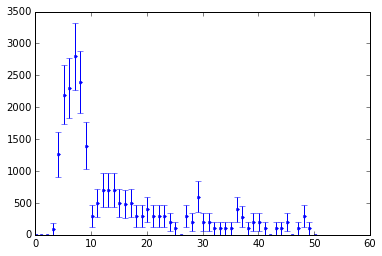

In [186]:
plt.errorbar(neutron['time'], neutron['counts'], neutron['counts']*neutron['error'], fmt='.')
plt.show()

In [190]:
e_check = pd.read_csv('energyproberror.dat', sep=r'\s*')
e_check

,energy,bin,error
0,0.10,0.00000,0.0000
1,0.60,111903.00000,0.0010
2,0.65,10703.90000,0.0044
3,0.70,9784.97000,0.0046
4,0.75,9011.76000,0.0048
5,0.80,8231.19000,0.0050
6,0.85,7563.71000,0.0053
7,0.90,6912.01000,0.0055
8,0.95,6336.86000,0.0058
9,1.00,5761.92000,0.0060


KeyError: 'prob'

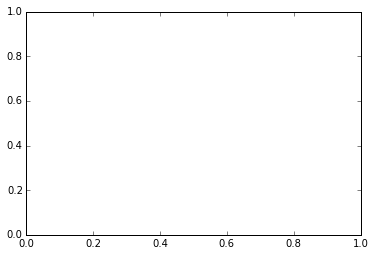

In [192]:
plt.figure()
plt.subplot(111)
plt.errorbar(e_check['energy'], e_check['bin'], e_check['bin'] * e_check['error'])
plt.yscale('log')
x1=np.linspace(0.1 , 0.6, 1000)
x2=np.linspace(0.6, 1.5, 1000)
x3=np.linspace(1.5, 10.5, 1000)
plt.plot(x1, [6.6 for x in x1], 'r--')
plt.plot(x2, med_erg(x2), 'r--')
plt.plot(x3, high_erg(x3), 'r--')
plt.show()

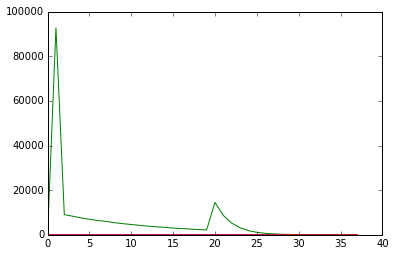

In [176]:
plt.plot(e_check)
plt.show()

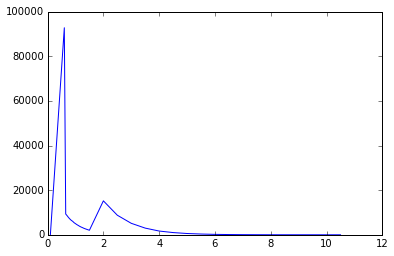

In [171]:
p = np.loadtxt('energyproberror.dat')
plt.plot(p[:,0], p[:,1])
plt.show()

In [169]:
p

array([[  1.00000000e-01,   0.00000000e+00,   0.00000000e+00],
       [  6.00000000e-01,   9.27650000e+04,   1.20000000e-03],
       [  6.50000000e-01,   9.31858000e+03,   4.70000000e-03],
       [  7.00000000e-01,   8.56699000e+03,   4.90000000e-03],
       [  7.50000000e-01,   7.75507000e+03,   5.20000000e-03],
       [  8.00000000e-01,   7.06705000e+03,   5.40000000e-03],
       [  8.50000000e-01,   6.46746000e+03,   5.70000000e-03],
       [  9.00000000e-01,   6.03977000e+03,   5.90000000e-03],
       [  9.50000000e-01,   5.42548000e+03,   6.20000000e-03],
       [  1.00000000e+00,   4.99736000e+03,   6.50000000e-03],
       [  1.05000000e+00,   4.56167000e+03,   6.80000000e-03],
       [  1.10000000e+00,   4.19149000e+03,   7.10000000e-03],
       [  1.15000000e+00,   3.80791000e+03,   7.50000000e-03],
       [  1.20000000e+00,   3.48941000e+03,   7.80000000e-03],
       [  1.25000000e+00,   3.22151000e+03,   8.10000000e-03],
       [  1.30000000e+00,   2.92312000e+03,   8.5000000

In [189]:
high_erg(2.0)

0.81389902061123887

In [180]:
med_erg(1.5)

1.3988949512487889

In [188]:
med_erg(0.65)

6.3514466408012336